In [1]:
from sea_breeze import sea_breeze_filters, load_model_data, sea_breeze_funcs, utils
from dask.distributed import Client
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr
import glob
import numpy as np

In [2]:
client = Client()
client

/g/data/xp65/public/apps/med_conda/envs/analysis3-24.07/lib/python3.11/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 46395 instead
  warnings.warn(


<Client: 'tcp://127.0.0.1:34541' processes=7 threads=14, memory=63.00 GiB>

2025-06-13 16:06:31,724 - distributed.nanny.memory - WARNING - Worker tcp://127.0.0.1:43277 (pid=359558) exceeded 95% memory budget. Restarting...
2025-06-13 16:06:31,955 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:43277' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('groupby_mean-chunk-2a14c0cb7ea8d183d9649b3c68f88658', 0, 0, 286), ('groupby_mean-chunk-2a14c0cb7ea8d183d9649b3c68f88658', 0, 0, 261), ('groupby_mean-chunk-2a14c0cb7ea8d183d9649b3c68f88658', 0, 0, 276), ('concatenate-059876844983e4499d88220a46e826ff', 272, 0, 0), ('groupby_mean-chunk-2a14c0cb7ea8d183d9649b3c68f88658', 0, 0, 282), ('groupby_mean-chunk-2a14c0cb7ea8d183d9649b3c68f88658', 0, 0, 285), ('groupby_mean-chunk-2a14c0cb7ea8d183d9649b3c68f88658', 0, 0, 260), ('groupby_mean-chunk-2a14c0cb7ea8d183d9649b3c68f88658', 0, 0, 263), ('concatenate-059876844983e4499d88220a46e826ff', 269, 0, 0), ('groupby_mean-chunk-2a14c0cb7ea8d183d9649b3c68f88658', 0, 0, 266

In [3]:
uname = "ua100m"
vname = "va100m"

In [4]:
ds_nov_apr = xr.open_mfdataset(
    np.sort(
        glob.glob("/g/data/ng72/ab4502/hourly_composites/barra_c/barra_c_hourly_perturbation_"+uname+"_"+vname+"_????11*.nc") +\
        glob.glob("/g/data/ng72/ab4502/hourly_composites/barra_c/barra_c_hourly_perturbation_"+uname+"_"+vname+"_????12*.nc") +\
        glob.glob("/g/data/ng72/ab4502/hourly_composites/barra_c/barra_c_hourly_perturbation_"+uname+"_"+vname+"_????01*.nc") +\
        glob.glob("/g/data/ng72/ab4502/hourly_composites/barra_c/barra_c_hourly_perturbation_"+uname+"_"+vname+"_????02*.nc") +\
        glob.glob("/g/data/ng72/ab4502/hourly_composites/barra_c/barra_c_hourly_perturbation_"+uname+"_"+vname+"_????03*.nc") +\
        glob.glob("/g/data/ng72/ab4502/hourly_composites/barra_c/barra_c_hourly_perturbation_"+uname+"_"+vname+"_????04*.nc")),
    concat_dim="month",
    combine="nested"
)

ds_may_oct = xr.open_mfdataset(
    np.sort(
        glob.glob("/g/data/ng72/ab4502/hourly_composites/barra_c/barra_c_hourly_perturbation_"+uname+"_"+vname+"_????05*.nc") +\
        glob.glob("/g/data/ng72/ab4502/hourly_composites/barra_c/barra_c_hourly_perturbation_"+uname+"_"+vname+"_????06*.nc") +\
        glob.glob("/g/data/ng72/ab4502/hourly_composites/barra_c/barra_c_hourly_perturbation_"+uname+"_"+vname+"_????07*.nc") +\
        glob.glob("/g/data/ng72/ab4502/hourly_composites/barra_c/barra_c_hourly_perturbation_"+uname+"_"+vname+"_????08*.nc") +\
        glob.glob("/g/data/ng72/ab4502/hourly_composites/barra_c/barra_c_hourly_perturbation_"+uname+"_"+vname+"_????09*.nc") +\
        glob.glob("/g/data/ng72/ab4502/hourly_composites/barra_c/barra_c_hourly_perturbation_"+uname+"_"+vname+"_????10*.nc")),
    concat_dim="month",
    combine="nested"
)


vprime_nov_apr = ds_nov_apr.vprime_pert.mean("month").persist()
cf_nov_apr = ds_nov_apr.cf_pert.mean("month").persist()
vprime_may_oct = ds_may_oct.vprime_pert.mean("month").persist()
cf_may_oct = ds_may_oct.cf_pert.mean("month").persist()

In [5]:
ds_total_nov_apr = xr.open_mfdataset(
    np.sort(
        glob.glob("/g/data/ng72/ab4502/hourly_composites/barra_c/barra_c_hourly_"+uname+"_"+vname+"_????11*.nc") +\
        glob.glob("/g/data/ng72/ab4502/hourly_composites/barra_c/barra_c_hourly_"+uname+"_"+vname+"_????12*.nc") +\
        glob.glob("/g/data/ng72/ab4502/hourly_composites/barra_c/barra_c_hourly_"+uname+"_"+vname+"_????01*.nc") +\
        glob.glob("/g/data/ng72/ab4502/hourly_composites/barra_c/barra_c_hourly_"+uname+"_"+vname+"_????02*.nc") +\
        glob.glob("/g/data/ng72/ab4502/hourly_composites/barra_c/barra_c_hourly_"+uname+"_"+vname+"_????03*.nc") +\
        glob.glob("/g/data/ng72/ab4502/hourly_composites/barra_c/barra_c_hourly_"+uname+"_"+vname+"_????04*.nc")),
    concat_dim="month",
    combine="nested"
)

vprime_total_nov_apr = ds_total_nov_apr.vprime.mean("month").persist()
cf_total_nov_apr = ds_total_nov_apr.cf.mean("month").persist()

In [6]:
# import pandas as pd
# import datetime as dt

# ds = ds_nov_apr

# lst_da_ls = []
# for h in np.arange(0,24):
#     lst = [dt.datetime(2000,1,1,h) + dt.timedelta(hours=l / 180 * 12) for l in ds.lon.values]
#     lst = np.array(pd.to_datetime(lst).round("h").hour)
#     lst_arr = np.repeat(lst[np.newaxis,:],ds.lat.shape,axis=0)
#     lst_da = xr.DataArray(data=lst_arr,dims=["lat","lon"],coords={"lat":ds.lat,"lon":ds.lon})
#     lst_da_ls.append(lst_da)

# lst_da = xr.concat(lst_da_ls,dim="hour")
# lst_da = lst_da.assign_coords({"hour":np.arange(0,24)})

# vprime_nov_apr_lt = xr.concat([vprime_nov_apr.where(lst_da==h,drop=True).mean("hour") for h in np.arange(24)],dim="hour").chunk({"lon":-1}).interpolate_na(dim="lon").persist()

In [7]:
lat_slice, lon_slice = utils.get_aus_bounds()
t1 = "2016-01-01 00:00"
t2 = "2016-01-31 23:00"

angle_ds = load_model_data.get_coastline_angle_kernel(
    compute=False,
    path_to_load="/g/data/ng72/ab4502/coastline_data/barra_c.nc",
    lat_slice=lat_slice,
    lon_slice=lon_slice)

_,lsm = load_model_data.load_barra_static("AUST-04",lon_slice,lat_slice)
min_coast_dist = xr.where(lsm,angle_ds.min_coast_dist,-angle_ds.min_coast_dist)

In [8]:
ds_nov_apr.month.shape[0] / 6

24.0

In [9]:
ds_total_nov_apr.month.shape[0] / 6

4.0

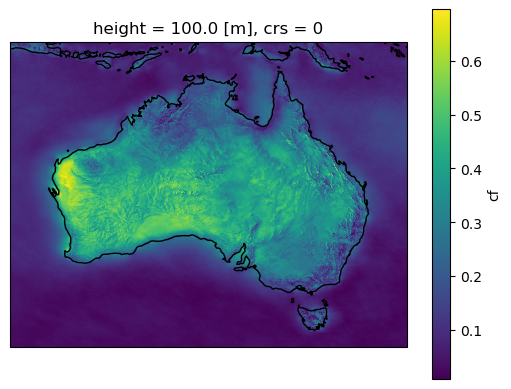

In [10]:
ax=plt.axes(projection=ccrs.PlateCarree())
(cf_total_nov_apr.max("hour") - cf_total_nov_apr.min("hour")).plot()
ax.coastlines()

In [66]:
def load(model,diagnostic,chunks={"time":10}):

    ds = xr.open_mfdataset("/g/data/ng72/ab4502/sea_breeze_detection/"+\
                      model+\
                      "/filters/filtered_mask_no_hourly_change_"+\
                      diagnostic+\
                      "_*.zarr/",
                 chunks=chunks, engine="zarr")   
    
    return ds

F = load("barra_c_smooth_s2","F")
fuzzy = load("barra_c_smooth_s2","fuzzy")

In [67]:
F_hourly = F.mask.groupby("time.hour").mean().persist()
fuzzy_hourly = fuzzy.mask.groupby("time.hour").mean().persist()

2025-06-13 16:28:36,474 - distributed.worker.memory - WARNING - Worker is at 83% memory usage. Pausing worker.  Process memory: 7.50 GiB -- Worker memory limit: 9.00 GiB
2025-06-13 16:28:36,973 - distributed.worker.memory - WARNING - Worker is at 65% memory usage. Resuming worker. Process memory: 5.90 GiB -- Worker memory limit: 9.00 GiB
2025-06-13 16:28:56,882 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 6.23 GiB -- Worker memory limit: 9.00 GiB
2025-06-13 16:29:29,696 - distributed.worker - ERROR - Worker stream died during communication: tcp://127.0.0.1:37437
Traceback (most recent call last):
  File "/g/data/xp65/public/apps/med_conda/envs/analysis3-24.07/lib/python3.11/site-packages/distributed/comm/tcp.py", line 225, in read
    frames_nospli

In [63]:
ds_aus2200_period = xr.open_mfdataset(
    np.sort(
        glob.glob("/g/data/ng72/ab4502/hourly_composites/barra_c/barra_c_hourly_perturbation_ua100m_va100m_201301010000_201301312300.nc") +\
        glob.glob("/g/data/ng72/ab4502/hourly_composites/barra_c/barra_c_hourly_perturbation_ua100m_va100m_201302010000_201302282300.nc") +\
        glob.glob("/g/data/ng72/ab4502/hourly_composites/barra_c/barra_c_hourly_perturbation_ua100m_va100m_201601010000_201601312300.nc") +\
        glob.glob("/g/data/ng72/ab4502/hourly_composites/barra_c/barra_c_hourly_perturbation_ua100m_va100m_201602010000_201602292300.nc") +\
        glob.glob("/g/data/ng72/ab4502/hourly_composites/barra_c/barra_c_hourly_perturbation_ua100m_va100m_201801010000_201801312300.nc") +\
        glob.glob("/g/data/ng72/ab4502/hourly_composites/barra_c/barra_c_hourly_perturbation_ua100m_va100m_201802010000_201802282300.nc")),
    concat_dim="month",
    combine="nested"
)

vprime_pert_aus2200_period = ds_aus2200_period.vprime_pert.mean("month").persist()                  


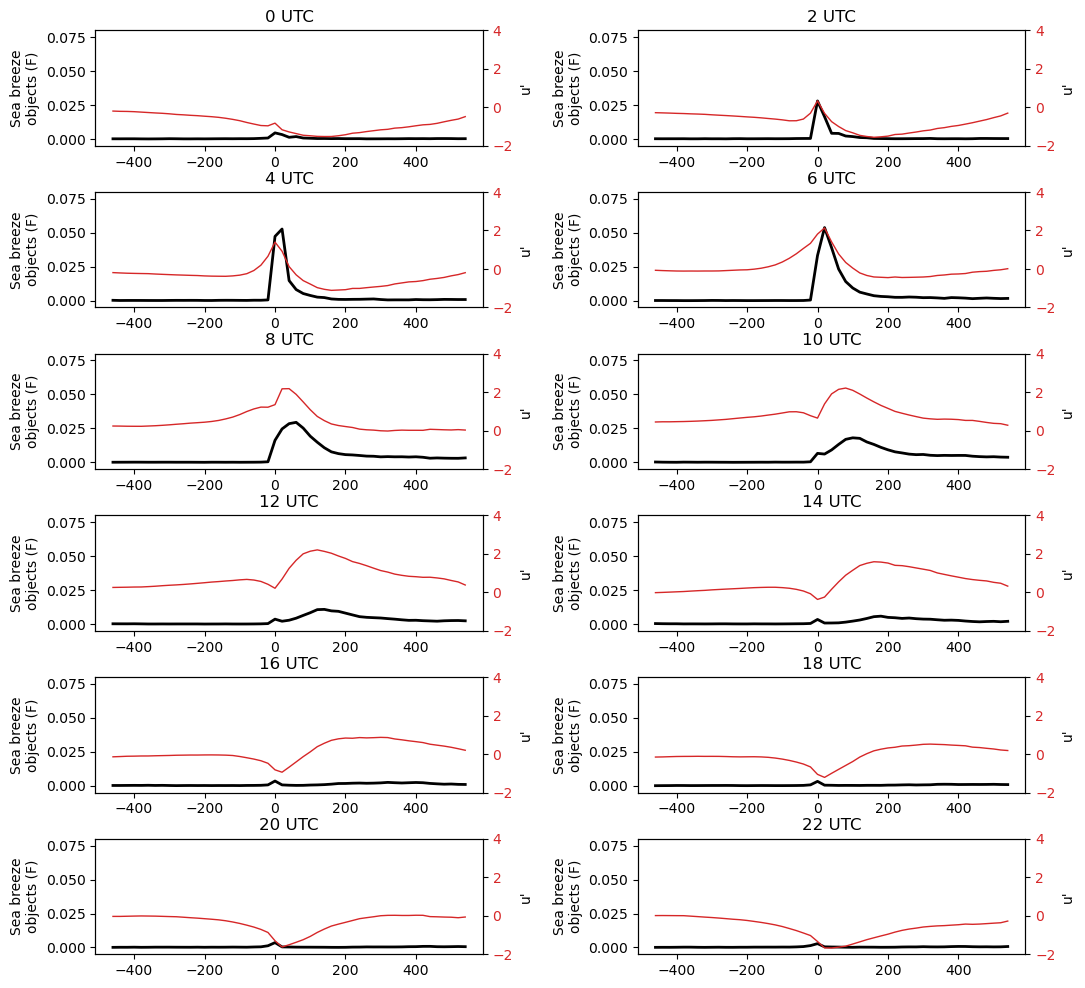

In [72]:
def summarise_oe(hourly_pert, variance, h, min_coast_dist, lsm, xbins = np.arange(-470,570,20)):

    hourly_flat = hourly_pert.sel(hour=h).values.flatten()
    coast_flat = min_coast_dist.values.flatten()
    variance_flat = variance.values.flatten()
    
    lsm_flat = lsm.values.flatten()
    lsm_flat = lsm_flat[variance_flat<0.5]
    
    x = coast_flat[variance_flat<0.5]
    y = hourly_flat[variance_flat<0.5]
    
    centred_bins = (xbins[0:-1] + xbins[1:])/2
    mean = [np.mean(y[(x>=xbins[b]) & (x<xbins[b+1])]) for b in range(len(xbins)-1)]
    try:
        q25 = [np.quantile(y[(x>=xbins[b]) & (x<xbins[b+1])],0.25) for b in range(len(xbins)-1)]
    except:
        q25 = np.nan
    try:
        q75 = [np.quantile(y[(x>=xbins[b]) & (x<xbins[b+1])],0.75) for b in range(len(xbins)-1)]
    except:
        q75 = np.nan

    return centred_bins, mean, q25, q75



variance = angle_ds.variance_interp
plt.figure(figsize=[12,12])


cnt=1
for h in [0,2,4,6,8,10,12,14,16,18,20,22]:

    plt.subplot(6,2,cnt)
    
    xbins, y, _, _ = summarise_oe(
        F_hourly,
        variance,
        h,
        min_coast_dist,
        lsm)
    plt.plot(xbins,y,color="k",lw=2)
    plt.gca().set_ylim([-0.005,0.08])
    plt.gca().set_ylabel("Sea breeze\nobjects (F)")
    
    plt.gca().twinx()
    xbins, y, _, _ = summarise_oe(
        vprime_pert_aus2200_period,
        variance,
        h,
        min_coast_dist,
        lsm)
    plt.plot(xbins,y,color="tab:red",lw=1)
    plt.gca().set_ylim([-2,4])
    plt.title(str(h) + " UTC")
    plt.gca().tick_params(labelcolor="tab:red")
    plt.gca().set_ylabel("u'")

    cnt=cnt+1

plt.subplots_adjust(hspace=0.4,wspace=0.4)

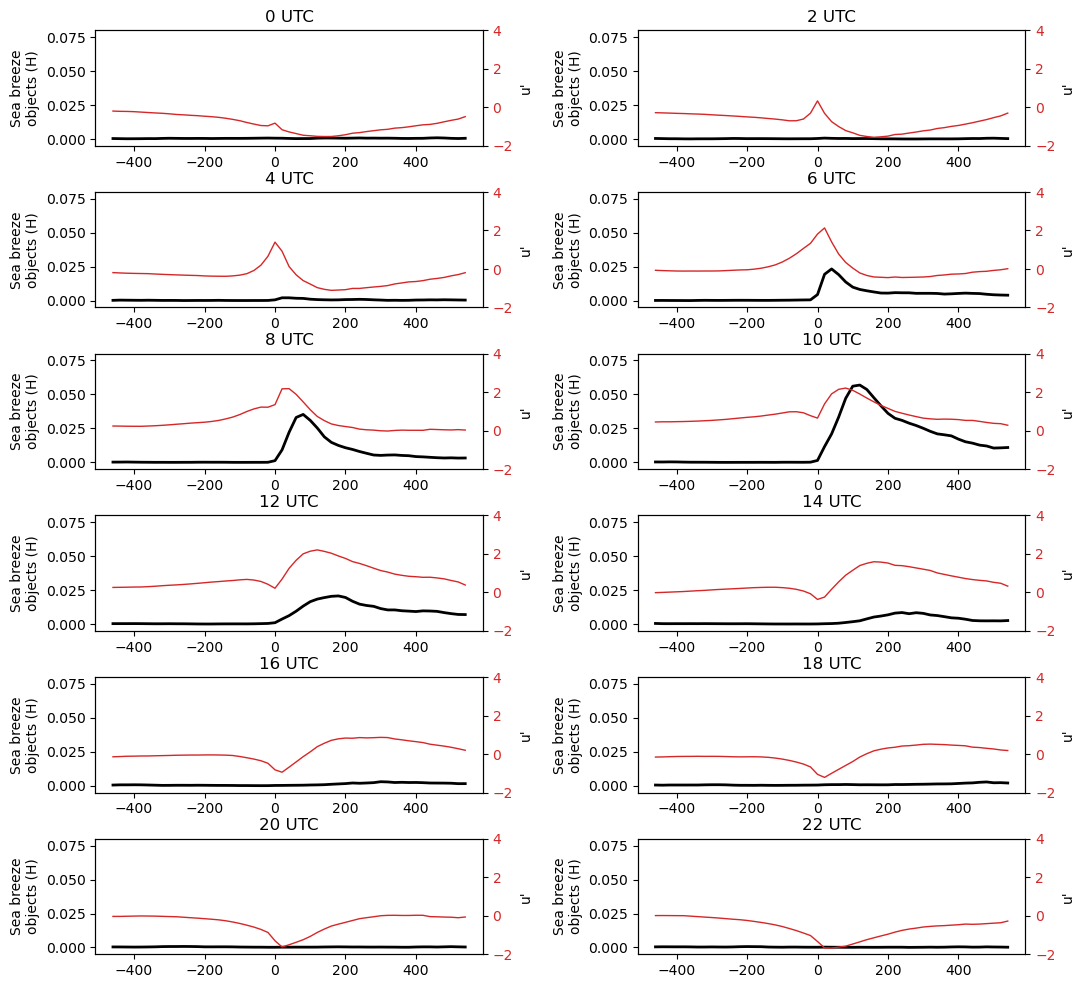

In [70]:


variance = angle_ds.variance_interp
plt.figure(figsize=[12,12])


cnt=1
for h in [0,2,4,6,8,10,12,14,16,18,20,22]:

    plt.subplot(6,2,cnt)
    
    xbins, y, _, _ = summarise_oe(
        fuzzy_hourly,
        variance,
        h,
        min_coast_dist,
        lsm)
    plt.plot(xbins,y,color="k",lw=2)
    plt.gca().set_ylim([-0.005,0.08])
    plt.gca().set_ylabel("Sea breeze\nobjects (H)")
    
    plt.gca().twinx()
    xbins, y, _, _ = summarise_oe(
        vprime_pert_aus2200_period,
        variance,
        h,
        min_coast_dist,
        lsm)
    plt.plot(xbins,y,color="tab:red",lw=1)
    plt.gca().set_ylim([-2,4])
    plt.title(str(h) + " UTC")
    plt.gca().tick_params(labelcolor="tab:red")
    plt.gca().set_ylabel("u'")

    cnt=cnt+1

plt.subplots_adjust(hspace=0.4,wspace=0.4)

## Vprime and CF perturbation maps, April-November/May-October

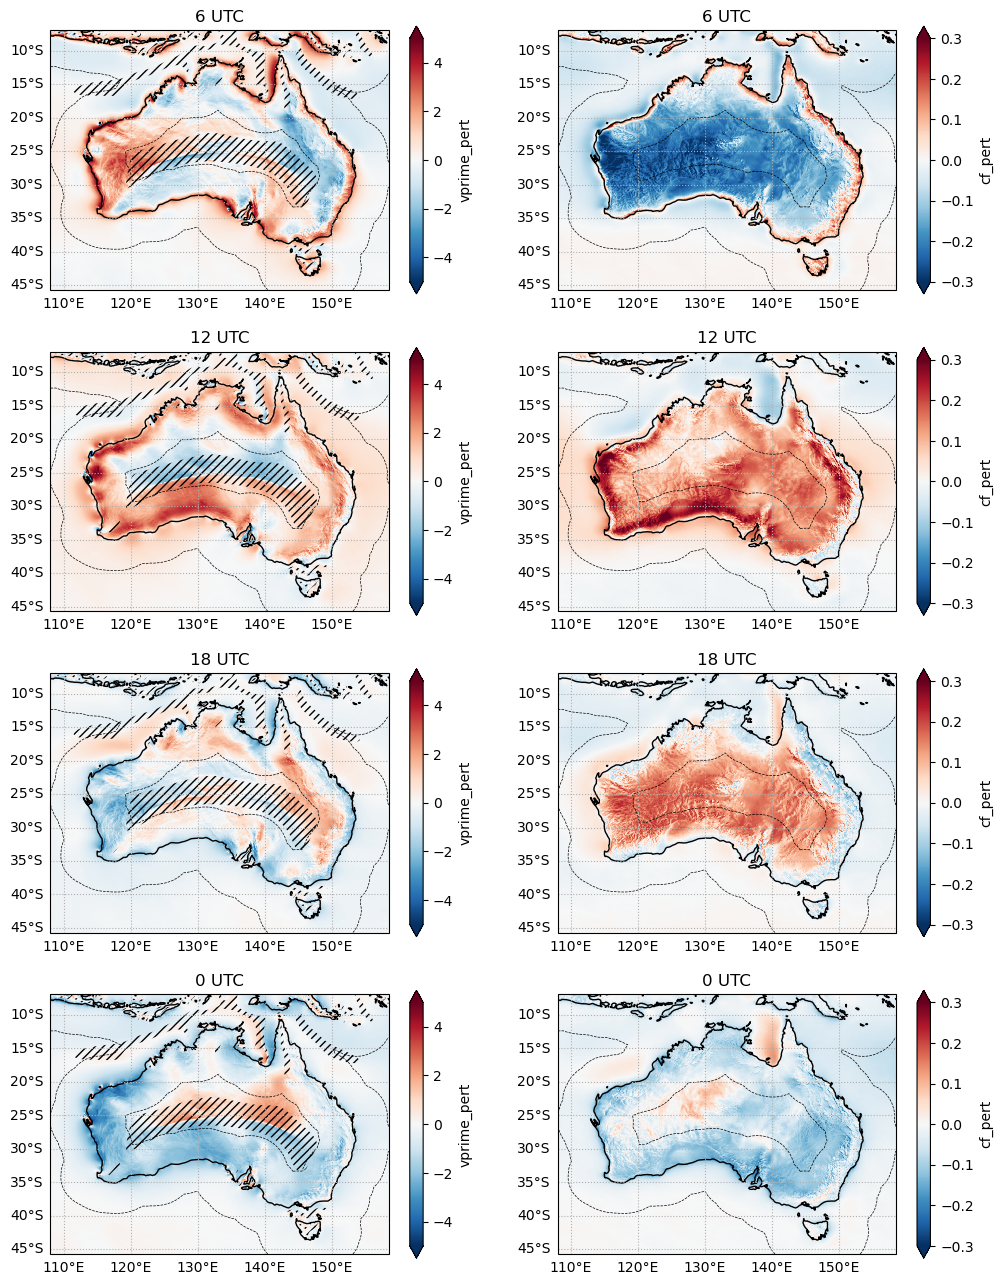

In [15]:
def plot_map(ax, hourly_pert, min_coast_dist, variance, h, vmin, vmax, outline_levels=[-1,1],hatching=True):
    
    
    hourly_pert.sel(hour=h).plot(vmin=vmin,vmax=vmax,cmap="RdBu_r",extend="both")
    #xr.plot.contour(hourly_pert.sel(hour=h),levels=outline_levels,colors="k",linewidths=0.5)
    xr.plot.contour(min_coast_dist,levels=[-500,500],colors="k",linewidths=0.5,linestyles=["--"])
    ax.coastlines()
    if hatching:
        xr.plot.contourf(variance,levels=[0.,0.5],hatches=["","////"],colors="none",add_colorbar=False)
    plt.title(str(h)+" UTC")
    ax.gridlines(draw_labels=["left","bottom"],ls=":")


cf_ouline_levels=[-0.2,0.2]

plt.figure(figsize=[12,16])
ax=plt.subplot(4,2,1,projection=ccrs.PlateCarree())
plot_map(ax,vprime_nov_apr,min_coast_dist,angle_ds.variance_interp,6,-5,5)

ax=plt.subplot(4,2,2,projection=ccrs.PlateCarree())
plot_map(ax,cf_nov_apr,min_coast_dist,angle_ds.variance_interp,6,-0.3,0.3,outline_levels=cf_ouline_levels,hatching=False)

ax=plt.subplot(4,2,3,projection=ccrs.PlateCarree())
plot_map(ax,vprime_nov_apr,min_coast_dist,angle_ds.variance_interp,12,-5,5)

ax=plt.subplot(4,2,4,projection=ccrs.PlateCarree())
plot_map(ax,cf_nov_apr,min_coast_dist,angle_ds.variance_interp,12,-0.3,0.3,outline_levels=cf_ouline_levels,hatching=False)

ax=plt.subplot(4,2,5,projection=ccrs.PlateCarree())
plot_map(ax,vprime_nov_apr,min_coast_dist,angle_ds.variance_interp,18,-5,5)

ax=plt.subplot(4,2,6,projection=ccrs.PlateCarree())
plot_map(ax,cf_nov_apr,min_coast_dist,angle_ds.variance_interp,18,-0.3,0.3,outline_levels=cf_ouline_levels,hatching=False)

ax=plt.subplot(4,2,7,projection=ccrs.PlateCarree())
plot_map(ax,vprime_nov_apr,min_coast_dist,angle_ds.variance_interp,0,-5,5)

ax=plt.subplot(4,2,8,projection=ccrs.PlateCarree())
plot_map(ax,cf_nov_apr,min_coast_dist,angle_ds.variance_interp,0,-0.3,0.3,outline_levels=cf_ouline_levels,hatching=False)

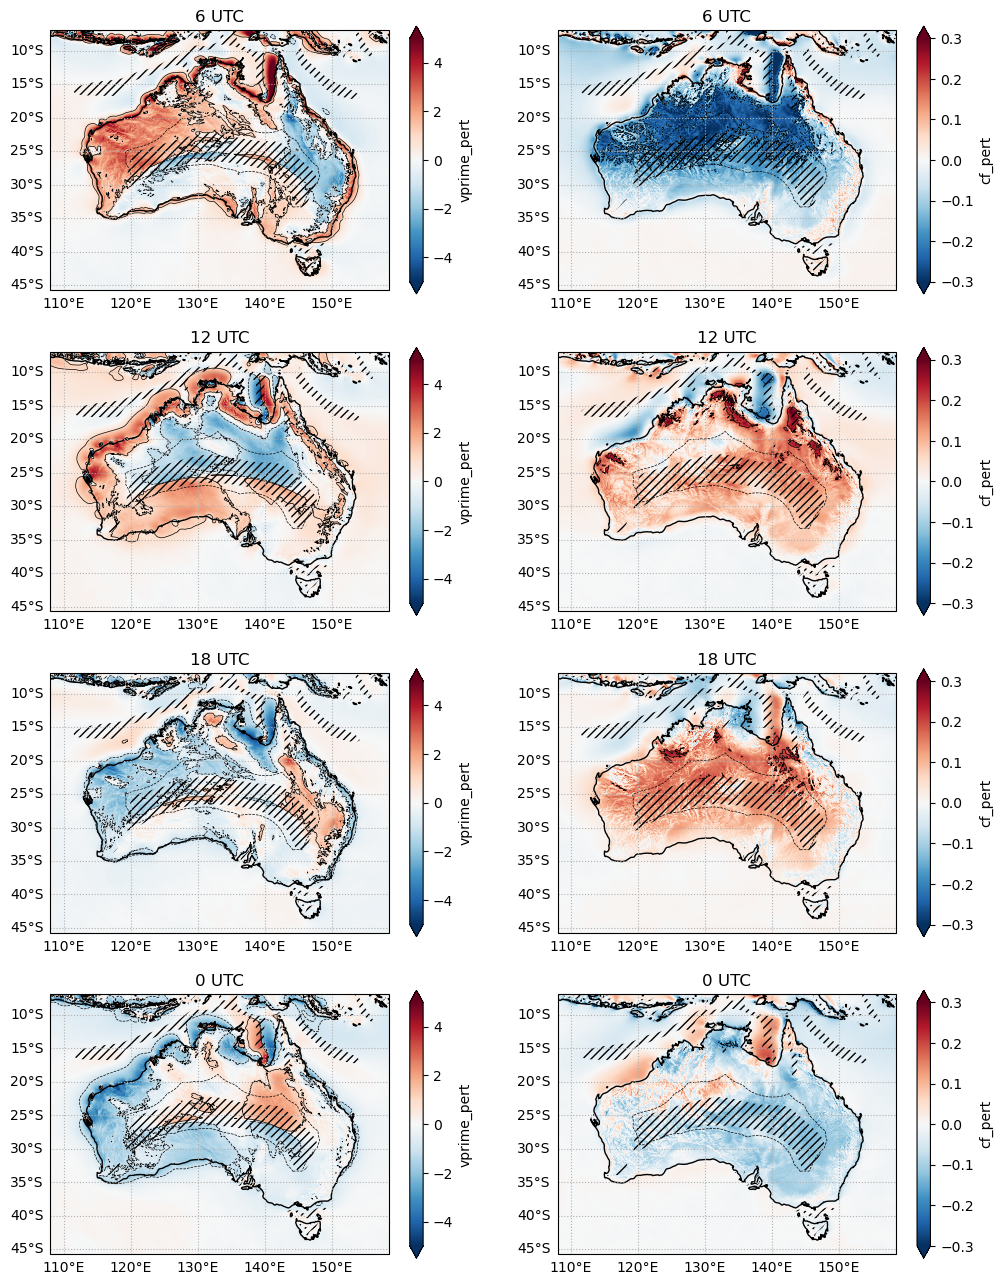

In [16]:
def plot_map(ax, hourly_pert, min_coast_dist, variance, h, vmin, vmax, outline_levels=[-1,1]):
    
    
    hourly_pert.sel(hour=h).plot(vmin=vmin,vmax=vmax,cmap="RdBu_r",extend="both")
    xr.plot.contour(hourly_pert.sel(hour=h),levels=outline_levels,colors="k",linewidths=0.5)
    xr.plot.contour(min_coast_dist,levels=[500],colors="k",linewidths=0.5,linestyles=["--"])
    ax.coastlines()
    xr.plot.contourf(variance,levels=[0.,0.5],hatches=["","////"],colors="none",add_colorbar=False)
    plt.title(str(h)+" UTC")
    ax.gridlines(draw_labels=["left","bottom"],ls=":")


cf_ouline_levels=[-0.2,0.2]

plt.figure(figsize=[12,16])
ax=plt.subplot(4,2,1,projection=ccrs.PlateCarree())
plot_map(ax,vprime_may_oct,min_coast_dist,angle_ds.variance_interp,6,-5,5)

ax=plt.subplot(4,2,2,projection=ccrs.PlateCarree())
plot_map(ax,cf_may_oct,min_coast_dist,angle_ds.variance_interp,6,-0.3,0.3,outline_levels=cf_ouline_levels)

ax=plt.subplot(4,2,3,projection=ccrs.PlateCarree())
plot_map(ax,vprime_may_oct,min_coast_dist,angle_ds.variance_interp,12,-5,5)

ax=plt.subplot(4,2,4,projection=ccrs.PlateCarree())
plot_map(ax,cf_may_oct,min_coast_dist,angle_ds.variance_interp,12,-0.3,0.3,outline_levels=cf_ouline_levels)

ax=plt.subplot(4,2,5,projection=ccrs.PlateCarree())
plot_map(ax,vprime_may_oct,min_coast_dist,angle_ds.variance_interp,18,-5,5)

ax=plt.subplot(4,2,6,projection=ccrs.PlateCarree())
plot_map(ax,cf_may_oct,min_coast_dist,angle_ds.variance_interp,18,-0.3,0.3,outline_levels=cf_ouline_levels)

ax=plt.subplot(4,2,7,projection=ccrs.PlateCarree())
plot_map(ax,vprime_may_oct,min_coast_dist,angle_ds.variance_interp,0,-5,5)

ax=plt.subplot(4,2,8,projection=ccrs.PlateCarree())
plot_map(ax,cf_may_oct,min_coast_dist,angle_ds.variance_interp,0,-0.3,0.3,outline_levels=cf_ouline_levels)

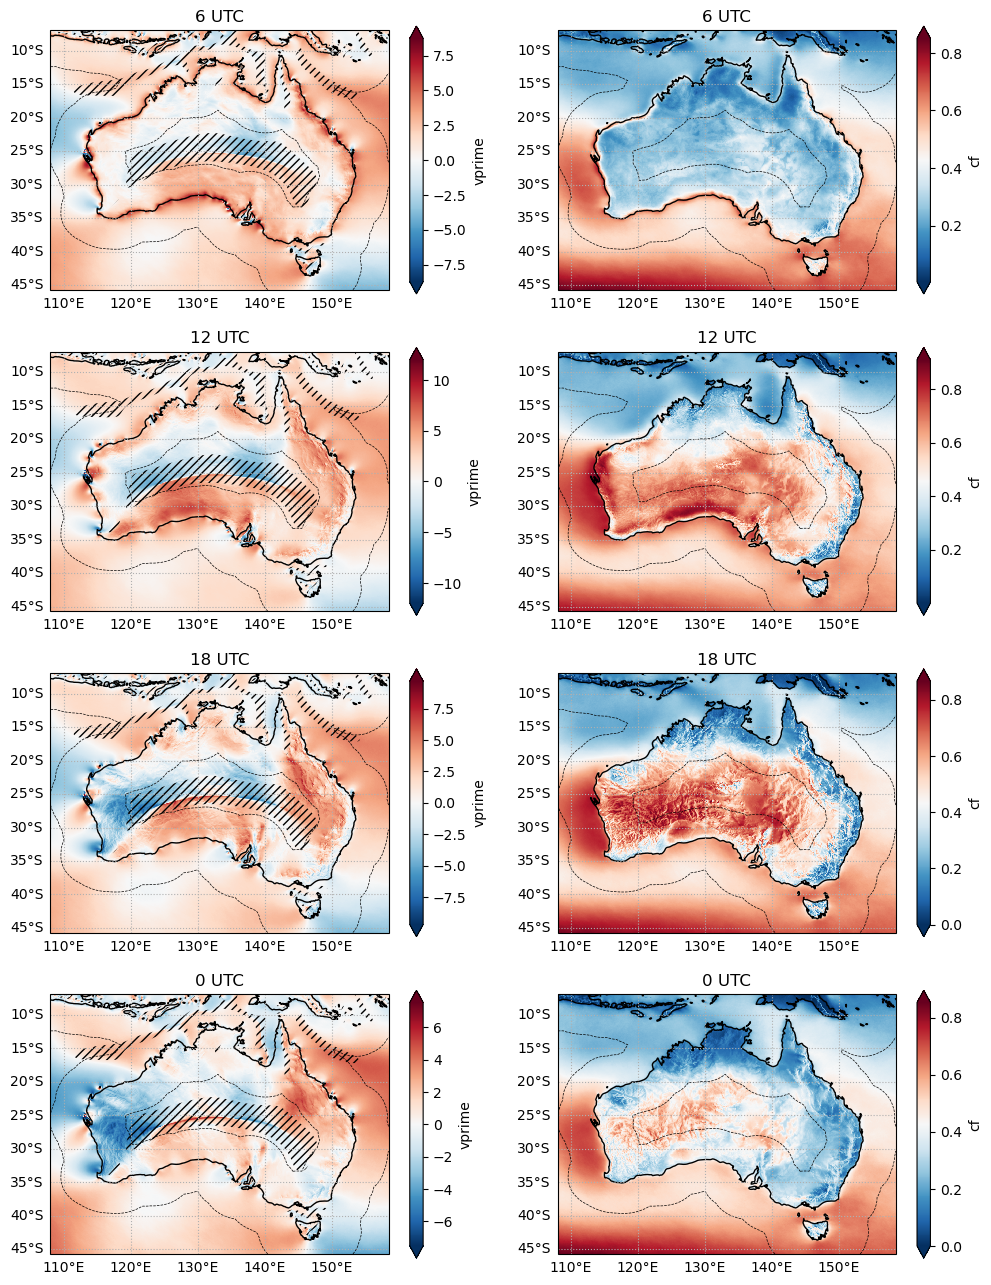

In [10]:
def plot_map(ax, hourly_pert, min_coast_dist, variance, h, vmin, vmax,hatching=True):
    
    
    hourly_pert.sel(hour=h).plot(vmin=vmin,vmax=vmax,cmap="RdBu_r",extend="both")
    xr.plot.contour(min_coast_dist,levels=[-500,500],colors="k",linewidths=0.5,linestyles=["--"])
    ax.coastlines()
    if hatching:
        xr.plot.contourf(variance,levels=[0.,0.5],hatches=["","////"],colors="none",add_colorbar=False)
    plt.title(str(h)+" UTC")
    ax.gridlines(draw_labels=["left","bottom"],ls=":")

vmin=None
vmax=None
outline_levels=[-1,1]

plt.figure(figsize=[12,16])
ax=plt.subplot(4,2,1,projection=ccrs.PlateCarree())
plot_map(ax,vprime_total_nov_apr,min_coast_dist,angle_ds.variance_interp,6,vmin,vmax)

ax=plt.subplot(4,2,2,projection=ccrs.PlateCarree())
plot_map(ax,cf_total_nov_apr,min_coast_dist,angle_ds.variance_interp,6,vmin,vmax,hatching=False)

ax=plt.subplot(4,2,3,projection=ccrs.PlateCarree())
plot_map(ax,vprime_total_nov_apr,min_coast_dist,angle_ds.variance_interp,12,vmin,vmax)

ax=plt.subplot(4,2,4,projection=ccrs.PlateCarree())
plot_map(ax,cf_total_nov_apr,min_coast_dist,angle_ds.variance_interp,12,vmin,vmax,hatching=False)

ax=plt.subplot(4,2,5,projection=ccrs.PlateCarree())
plot_map(ax,vprime_total_nov_apr,min_coast_dist,angle_ds.variance_interp,18,vmin,vmax)

ax=plt.subplot(4,2,6,projection=ccrs.PlateCarree())
plot_map(ax,cf_total_nov_apr,min_coast_dist,angle_ds.variance_interp,18,vmin,vmax,hatching=False)

ax=plt.subplot(4,2,7,projection=ccrs.PlateCarree())
plot_map(ax,vprime_total_nov_apr,min_coast_dist,angle_ds.variance_interp,0,vmin,vmax)

ax=plt.subplot(4,2,8,projection=ccrs.PlateCarree())
plot_map(ax,cf_total_nov_apr,min_coast_dist,angle_ds.variance_interp,0,vmin,vmax,hatching=False)

## Plot the annual average CF perturbation with distance from the coastline

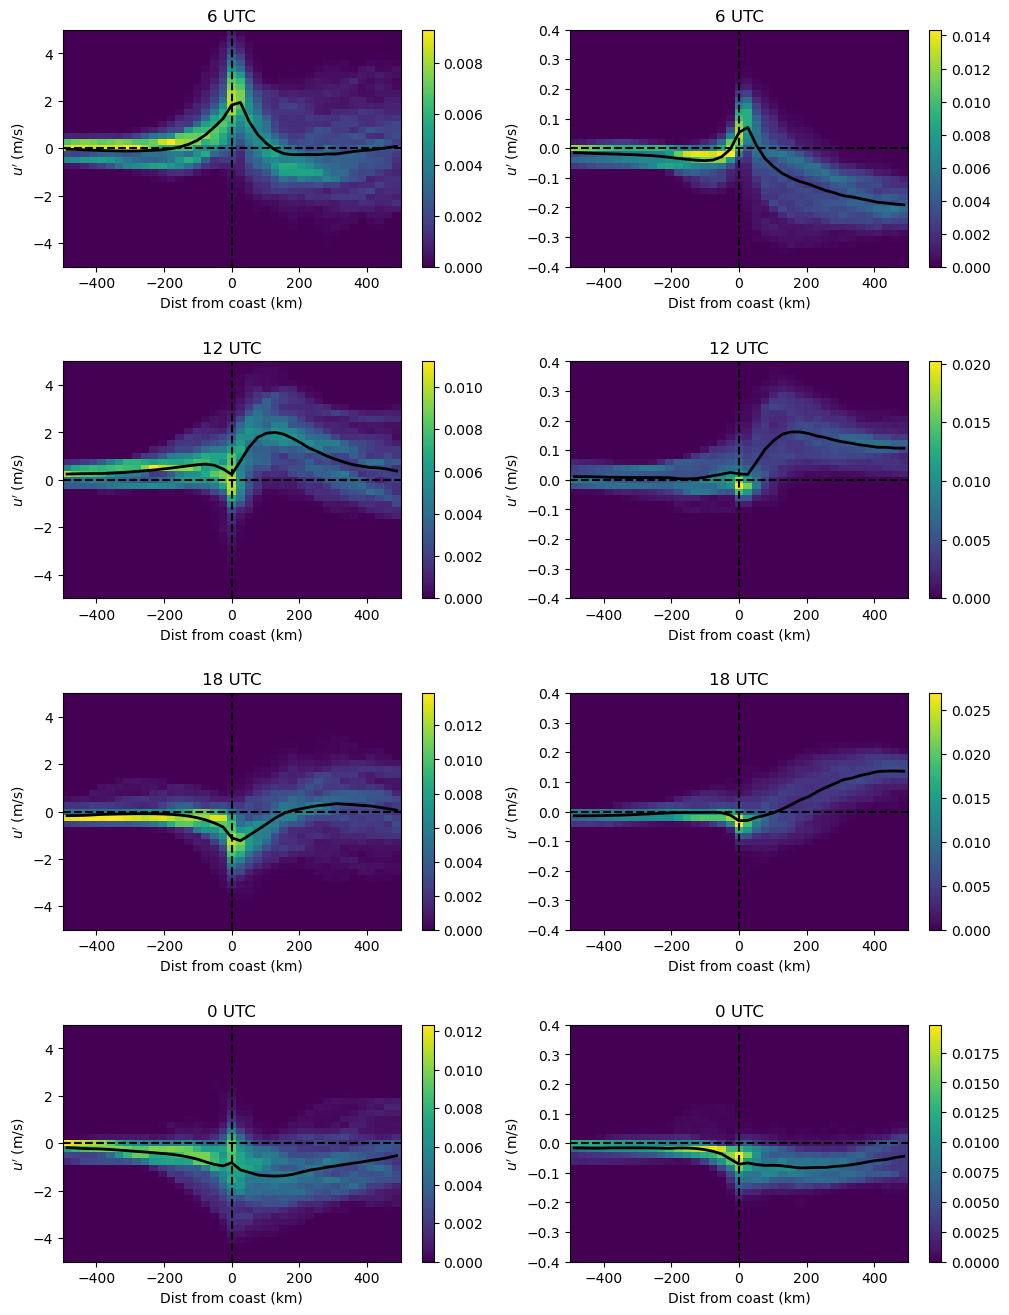

In [19]:
def plot(min_coast_dist,hourly_pert,variance,lsm,h,ax,xbins,ybins):

    hourly_flat = hourly_pert.sel(hour=h).values.flatten()
    coast_flat = min_coast_dist.values.flatten()
    variance_flat = variance.values.flatten()

    lsm_flat = lsm.values.flatten()
    lsm_flat = lsm_flat[variance_flat<0.5]
    w = np.where(lsm_flat==1,lsm_flat.sum(),lsm_flat.shape[0]-lsm_flat.sum())
    
    plt.hist2d(
        coast_flat[variance_flat<0.5],
        hourly_flat[variance_flat<0.5],
        weights=1/w,
        bins=[xbins,ybins],cmap="viridis");
    ax.axhline(ls="--",color="k") 
    ax.axvline(ls="--",color="k") 
    plt.xlabel("Dist from coast (km)")
    plt.ylabel("$u'$ (m/s)")
    plt.title(str(h) + " UTC")
    plt.colorbar()

    xbins, y, _, _ = summarise_oe(
        hourly_pert,
        variance,
        h,
        min_coast_dist,
        lsm,
        xbins)
    plt.plot(xbins,y,color="k",lw=2)

def summarise_oe(hourly_pert, variance, h, min_coast_dist, lsm, xbins = np.arange(-470,570,20)):

    hourly_flat = hourly_pert.sel(hour=h).values.flatten()
    coast_flat = min_coast_dist.values.flatten()
    variance_flat = variance.values.flatten()
    
    lsm_flat = lsm.values.flatten()
    lsm_flat = lsm_flat[variance_flat<0.5]
    
    x = coast_flat[variance_flat<0.5]
    y = hourly_flat[variance_flat<0.5]
    
    centred_bins = (xbins[0:-1] + xbins[1:])/2
    mean = [np.mean(y[(x>=xbins[b]) & (x<xbins[b+1])]) for b in range(len(xbins)-1)]
    try:
        q25 = [np.quantile(y[(x>=xbins[b]) & (x<xbins[b+1])],0.25) for b in range(len(xbins)-1)]
    except:
        q25 = np.nan
    try:
        q75 = [np.quantile(y[(x>=xbins[b]) & (x<xbins[b+1])],0.75) for b in range(len(xbins)-1)]
    except:
        q75 = np.nan

    return centred_bins, mean, q25, q75

xbins = np.linspace(-500,500,40)
ybins_vprime = np.linspace(-5,5,40)
ybins_cf = np.linspace(-0.4,0.4,40)

plt.figure(figsize=[12,16])

ax=plt.subplot(4,2,1)
plot(min_coast_dist,vprime_nov_apr,angle_ds.variance_interp,lsm,6,ax,xbins=xbins,ybins=ybins_vprime)

ax=plt.subplot(4,2,2)
plot(min_coast_dist,cf_nov_apr,angle_ds.variance_interp,lsm,6,ax,xbins=xbins,ybins=ybins_cf)


ax=plt.subplot(4,2,3)
plot(min_coast_dist,vprime_nov_apr,angle_ds.variance_interp,lsm,12,ax,xbins=xbins,ybins=ybins_vprime)

ax=plt.subplot(4,2,4)
plot(min_coast_dist,cf_nov_apr,angle_ds.variance_interp,lsm,12,ax,xbins=xbins,ybins=ybins_cf)


ax=plt.subplot(4,2,5)
plot(min_coast_dist,vprime_nov_apr,angle_ds.variance_interp,lsm,18,ax,xbins=xbins,ybins=ybins_vprime)

ax=plt.subplot(4,2,6)
plot(min_coast_dist,cf_nov_apr,angle_ds.variance_interp,lsm,18,ax,xbins=xbins,ybins=ybins_cf)

ax=plt.subplot(4,2,7)
plot(min_coast_dist,vprime_nov_apr,angle_ds.variance_interp,lsm,0,ax,xbins=xbins,ybins=ybins_vprime)

ax=plt.subplot(4,2,8)
plot(min_coast_dist,cf_nov_apr,angle_ds.variance_interp,lsm,0,ax,xbins=xbins,ybins=ybins_cf)


plt.subplots_adjust(hspace=0.4)

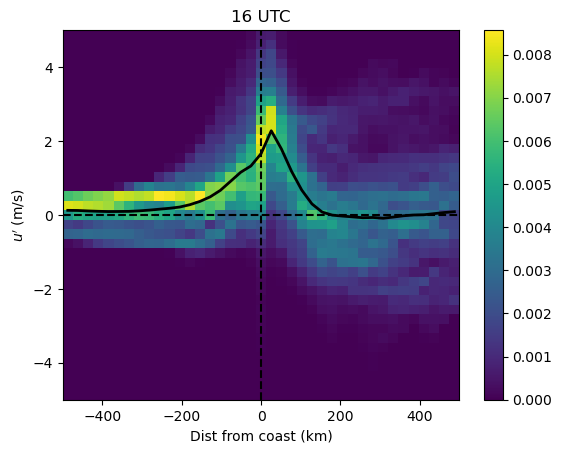

In [96]:
ax=plt.axes()
plot(min_coast_dist,vprime_nov_apr_lt.rename({"local_hour":"hour"}),angle_ds.variance_interp,lsm,16,ax,xbins=xbins,ybins=ybins_vprime)

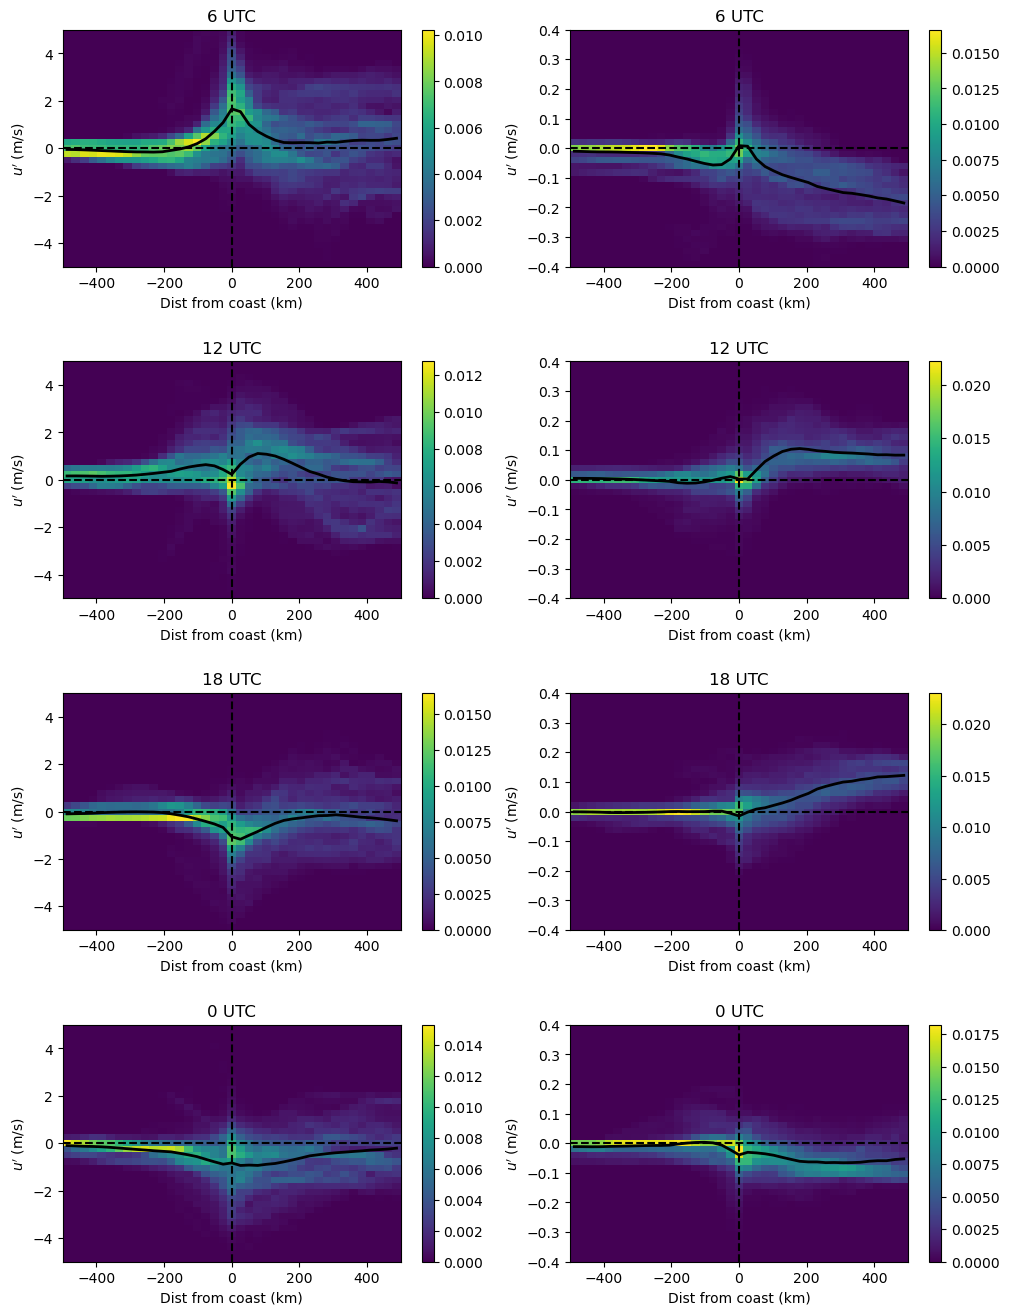

In [13]:
xbins = np.linspace(-500,500,40)
ybins_vprime = np.linspace(-5,5,40)
ybins_cf = np.linspace(-0.4,0.4,40)

plt.figure(figsize=[12,16])

ax=plt.subplot(4,2,1)
plot(min_coast_dist,vprime_may_oct,angle_ds.variance_interp,lsm,6,ax,xbins=xbins,ybins=ybins_vprime)

ax=plt.subplot(4,2,2)
plot(min_coast_dist,cf_may_oct,angle_ds.variance_interp,lsm,6,ax,xbins=xbins,ybins=ybins_cf)


ax=plt.subplot(4,2,3)
plot(min_coast_dist,vprime_may_oct,angle_ds.variance_interp,lsm,12,ax,xbins=xbins,ybins=ybins_vprime)

ax=plt.subplot(4,2,4)
plot(min_coast_dist,cf_may_oct,angle_ds.variance_interp,lsm,12,ax,xbins=xbins,ybins=ybins_cf)


ax=plt.subplot(4,2,5)
plot(min_coast_dist,vprime_may_oct,angle_ds.variance_interp,lsm,18,ax,xbins=xbins,ybins=ybins_vprime)

ax=plt.subplot(4,2,6)
plot(min_coast_dist,cf_may_oct,angle_ds.variance_interp,lsm,18,ax,xbins=xbins,ybins=ybins_cf)

ax=plt.subplot(4,2,7)
plot(min_coast_dist,vprime_may_oct,angle_ds.variance_interp,lsm,0,ax,xbins=xbins,ybins=ybins_vprime)

ax=plt.subplot(4,2,8)
plot(min_coast_dist,cf_may_oct,angle_ds.variance_interp,lsm,0,ax,xbins=xbins,ybins=ybins_cf)


plt.subplots_adjust(hspace=0.4)

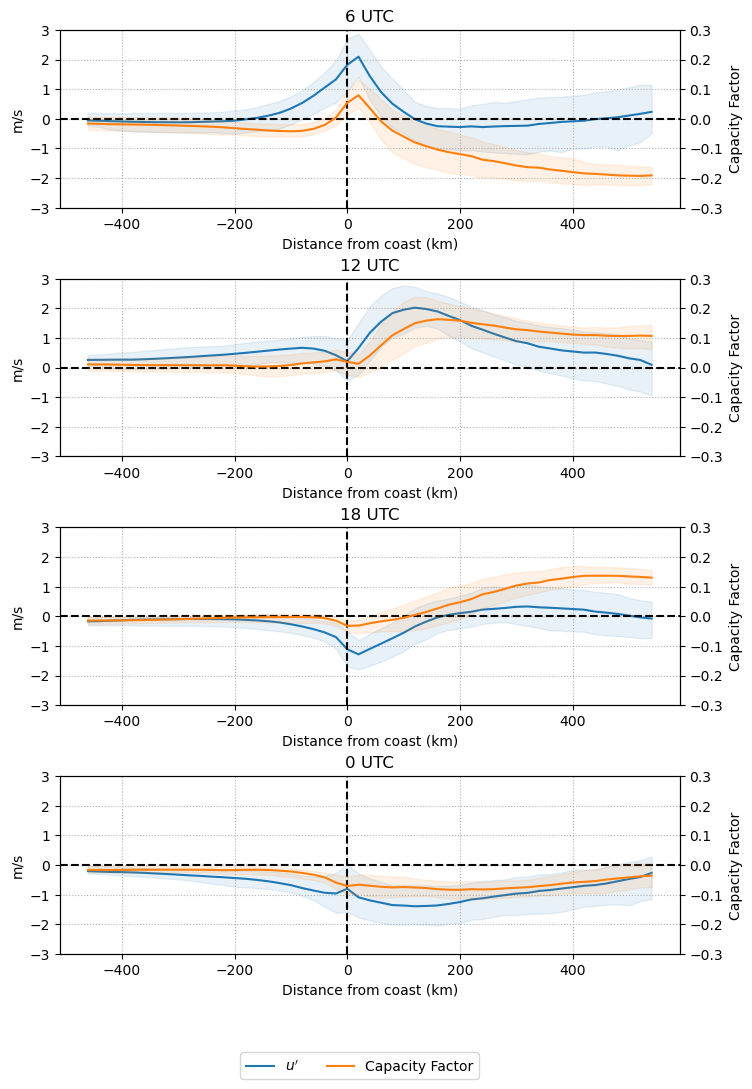

In [20]:
def plot(ax1, ax2, vprime_da, cf_da, variance, min_coast_dist, lsm, h, ls="-"):

    bins, y, up, low = summarise_oe(
        vprime_da,
        variance,
        h,
        min_coast_dist,
        lsm)
    l1,=ax1.plot(bins,y,label=str(h),color="tab:blue",ls=ls)
    ax1.fill_between(bins,low,up,color="tab:blue",alpha=0.1)
    
    bins, y, up, low = summarise_oe(
        cf_da,
        variance,
        h,
        min_coast_dist,
        lsm)
    l2,=ax2.plot(bins,y,label=str(h),color="tab:orange",ls=ls)
    ax2.fill_between(bins,low,up,color="tab:orange",alpha=0.1)
    
    ax1.grid(ls=":")
    ax1.axhline(ls="--",color="k")
    ax1.axvline(ls="--",color="k")

    plt.title(str(h)+" UTC")

    ax1.set_ylabel("m/s")
    ax2.set_ylabel("Capacity Factor")
    ax1.set_xlabel("Distance from coast (km)")

    return l1,l2

r=4
c=1

fig=plt.figure(figsize=[8,12])

ax1=plt.subplot(r,c,1); ax2=ax1.twinx()
ax1.set_ylim([-3,3])
ax2.set_ylim([-0.3,0.3])


plot(
    ax1,
    ax2,
    vprime_nov_apr,
    cf_nov_apr,
    angle_ds.variance_interp,
    min_coast_dist,
    lsm,
    6
)

ax1=plt.subplot(r,c,2); ax2=ax1.twinx()
ax1.set_ylim([-3,3])
ax2.set_ylim([-0.3,0.3])

plot(
    ax1,
    ax2,
    vprime_nov_apr,
    cf_nov_apr,
    angle_ds.variance_interp,
    min_coast_dist,
    lsm,
    12
)


ax1=plt.subplot(r,c,3); ax2=ax1.twinx()
ax1.set_ylim([-3,3])
ax2.set_ylim([-0.3,0.3])

plot(
    ax1,
    ax2,
    vprime_nov_apr,
    cf_nov_apr,
    angle_ds.variance_interp,
    min_coast_dist,
    lsm,
    18
)


ax1=plt.subplot(r,c,4); ax2=ax1.twinx()
ax1.set_ylim([-3,3])
ax2.set_ylim([-0.3,0.3])

l1,l2=plot(
    ax1,
    ax2,
    vprime_nov_apr,
    cf_nov_apr,
    angle_ds.variance_interp,
    min_coast_dist,
    lsm,
    0
)

plt.subplots_adjust(hspace=0.4)

fig.legend([l1,l2],["$u'$","Capacity Factor"],bbox_to_anchor=(0.5,0),loc="lower center",ncols=2)

# plot(
#     ax1,
#     ax2,
#     hourly_pert_djf.sel(lat=hourly_pert_djf.lat <= -30),
#     hourly_pert_cf_djf.sel(lat=hourly_pert_djf.lat <= -30),
#     angle_ds.variance_interp.sel(lat=hourly_pert_djf.lat <= -30),
#     min_coast_dist.sel(lat=hourly_pert_djf.lat <= -30),
#     lsm.sel(lat=hourly_pert_djf.lat <= -30),
#     6,
#     ls="--"
# )

# plot(
#     ax1,
#     ax2,
#     hourly_pert_djf.sel(lat=hourly_pert_djf.lat > -30),
#     hourly_pert_cf_djf.sel(lat=hourly_pert_djf.lat > -30),
#     angle_ds.variance_interp.sel(lat=hourly_pert_djf.lat > -30),
#     min_coast_dist.sel(lat=hourly_pert_djf.lat > -30),
#     lsm.sel(lat=hourly_pert_djf.lat > -30),
#     6,
#     ls=":"
# )






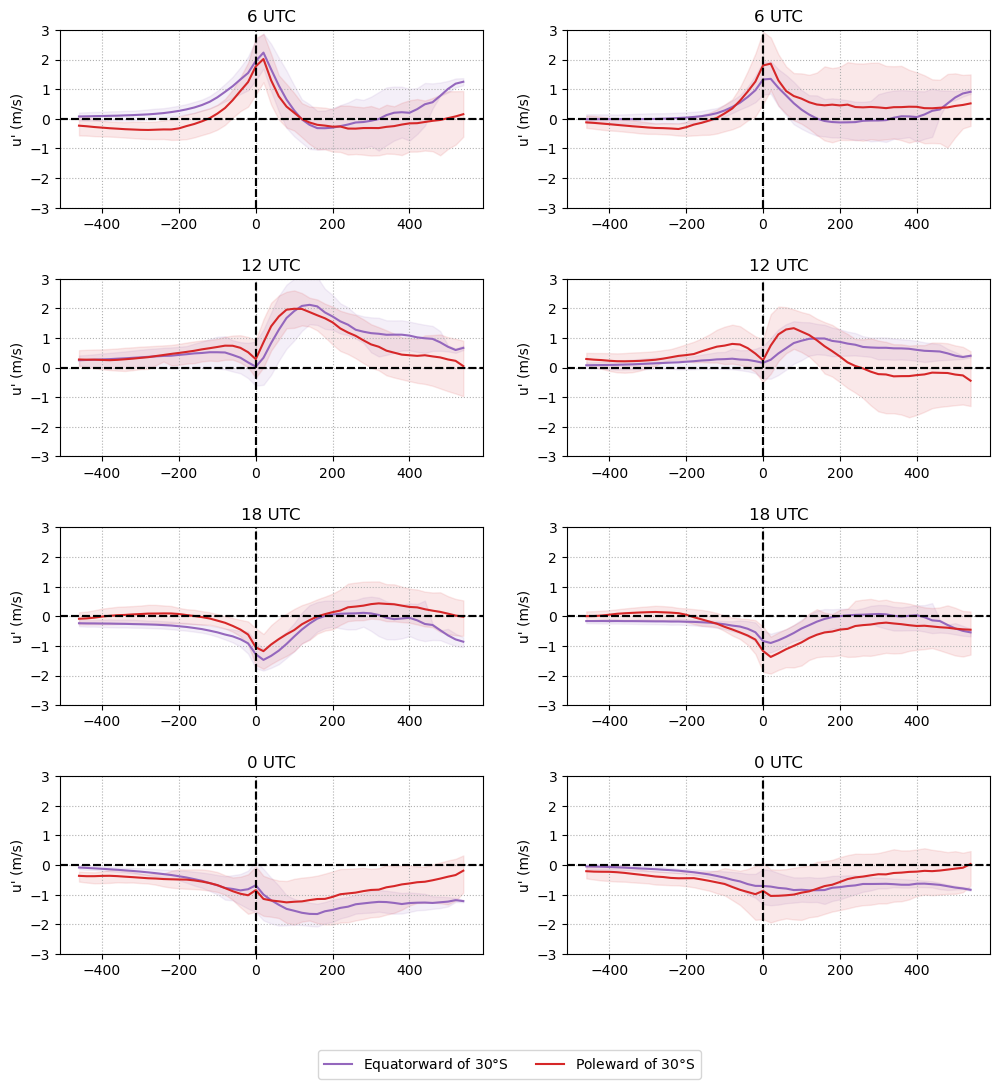

In [31]:
def plot(ax1, vprime_da, variance, min_coast_dist, lsm, h, ls="-", color="tab:blue"):

    bins, y, up, low = summarise_oe(
        vprime_da,
        variance,
        h,
        min_coast_dist,
        lsm)
    l1, = ax1.plot(bins,y,label=str(h),color=color,ls=ls)
    ax1.fill_between(bins,low,up,color=color,alpha=0.1)
    
    ax1.grid(ls=":")
    ax1.axhline(ls="--",color="k")
    ax1.axvline(ls="--",color="k")

    plt.title(str(h)+" UTC")

    ax1.set_ylabel("u' (m/s)")

    return l1


r=4
c=2

fig = plt.figure(figsize=[12,12])

ax1=plt.subplot(r,c,1)
ax1.set_ylim([-3,3])

plot(
    ax1,
    vprime_nov_apr.sel(lat=vprime_nov_apr.lat <= -30),
    angle_ds.variance_interp.sel(lat=vprime_nov_apr.lat <= -30),
    min_coast_dist.sel(lat=vprime_nov_apr.lat <= -30),
    lsm.sel(lat=vprime_nov_apr.lat <= -30),
    6,
    ls="-",
    color="tab:purple"
)

plot(
    ax1,
    vprime_nov_apr.sel(lat=vprime_nov_apr.lat > -30),
    angle_ds.variance_interp.sel(lat=vprime_nov_apr.lat > -30),
    min_coast_dist.sel(lat=vprime_nov_apr.lat > -30),
    lsm.sel(lat=vprime_nov_apr.lat > -30),
    6,
    ls="-",
    color="tab:red"
)


ax1=plt.subplot(r,c,3)
ax1.set_ylim([-3,3])

plot(
    ax1,
    vprime_nov_apr.sel(lat=vprime_nov_apr.lat <= -30),
    angle_ds.variance_interp.sel(lat=vprime_nov_apr.lat <= -30),
    min_coast_dist.sel(lat=vprime_nov_apr.lat <= -30),
    lsm.sel(lat=vprime_nov_apr.lat <= -30),
    12,
    ls="-",
    color="tab:purple"
)

plot(
    ax1,
    vprime_nov_apr.sel(lat=vprime_nov_apr.lat > -30),
    angle_ds.variance_interp.sel(lat=vprime_nov_apr.lat > -30),
    min_coast_dist.sel(lat=vprime_nov_apr.lat > -30),
    lsm.sel(lat=vprime_nov_apr.lat > -30),
    12,
    ls="-",
    color="tab:red"
)


ax1=plt.subplot(r,c,5)
ax1.set_ylim([-3,3])

plot(
    ax1,
    vprime_nov_apr.sel(lat=vprime_nov_apr.lat <= -30),
    angle_ds.variance_interp.sel(lat=vprime_nov_apr.lat <= -30),
    min_coast_dist.sel(lat=vprime_nov_apr.lat <= -30),
    lsm.sel(lat=vprime_nov_apr.lat <= -30),
    18,
    ls="-",
    color="tab:purple"
)

plot(
    ax1,
    vprime_nov_apr.sel(lat=vprime_nov_apr.lat > -30),
    angle_ds.variance_interp.sel(lat=vprime_nov_apr.lat > -30),
    min_coast_dist.sel(lat=vprime_nov_apr.lat > -30),
    lsm.sel(lat=vprime_nov_apr.lat > -30),
    18,
    ls="-",
    color="tab:red"
)


ax1=plt.subplot(r,c,7)
ax1.set_ylim([-3,3])

plot(
    ax1,
    vprime_nov_apr.sel(lat=vprime_nov_apr.lat <= -30),
    angle_ds.variance_interp.sel(lat=vprime_nov_apr.lat <= -30),
    min_coast_dist.sel(lat=vprime_nov_apr.lat <= -30),
    lsm.sel(lat=vprime_nov_apr.lat <= -30),
    0,
    ls="-",
    color="tab:purple"
)

plot(
    ax1,
    vprime_nov_apr.sel(lat=vprime_nov_apr.lat > -30),
    angle_ds.variance_interp.sel(lat=vprime_nov_apr.lat > -30),
    min_coast_dist.sel(lat=vprime_nov_apr.lat > -30),
    lsm.sel(lat=vprime_nov_apr.lat > -30),
    0,
    ls="-",
    color="tab:red"
)






ax1=plt.subplot(r,c,2)
ax1.set_ylim([-3,3])

plot(
    ax1,
    vprime_may_oct.sel(lat=vprime_may_oct.lat <= -30),
    angle_ds.variance_interp.sel(lat=vprime_may_oct.lat <= -30),
    min_coast_dist.sel(lat=vprime_may_oct.lat <= -30),
    lsm.sel(lat=vprime_may_oct.lat <= -30),
    6,
    ls="-",
    color="tab:purple"
)

plot(
    ax1,
    vprime_may_oct.sel(lat=vprime_may_oct.lat > -30),
    angle_ds.variance_interp.sel(lat=vprime_may_oct.lat > -30),
    min_coast_dist.sel(lat=vprime_may_oct.lat > -30),
    lsm.sel(lat=vprime_may_oct.lat > -30),
    6,
    ls="-",
    color="tab:red"
)


ax1=plt.subplot(r,c,4)
ax1.set_ylim([-3,3])

plot(
    ax1,
    vprime_may_oct.sel(lat=vprime_may_oct.lat <= -30),
    angle_ds.variance_interp.sel(lat=vprime_may_oct.lat <= -30),
    min_coast_dist.sel(lat=vprime_may_oct.lat <= -30),
    lsm.sel(lat=vprime_may_oct.lat <= -30),
    12,
    ls="-",
    color="tab:purple"
)

plot(
    ax1,
    vprime_may_oct.sel(lat=vprime_may_oct.lat > -30),
    angle_ds.variance_interp.sel(lat=vprime_may_oct.lat > -30),
    min_coast_dist.sel(lat=vprime_may_oct.lat > -30),
    lsm.sel(lat=vprime_may_oct.lat > -30),
    12,
    ls="-",
    color="tab:red"
)


ax1=plt.subplot(r,c,6)
ax1.set_ylim([-3,3])

plot(
    ax1,
    vprime_may_oct.sel(lat=vprime_may_oct.lat <= -30),
    angle_ds.variance_interp.sel(lat=vprime_may_oct.lat <= -30),
    min_coast_dist.sel(lat=vprime_may_oct.lat <= -30),
    lsm.sel(lat=vprime_may_oct.lat <= -30),
    18,
    ls="-",
    color="tab:purple"
)

plot(
    ax1,
    vprime_may_oct.sel(lat=vprime_may_oct.lat > -30),
    angle_ds.variance_interp.sel(lat=vprime_may_oct.lat > -30),
    min_coast_dist.sel(lat=vprime_may_oct.lat > -30),
    lsm.sel(lat=vprime_may_oct.lat > -30),
    18,
    ls="-",
    color="tab:red"
)


ax1=plt.subplot(r,c,8)
ax1.set_ylim([-3,3])

l1 = plot(
    ax1,
    vprime_may_oct.sel(lat=vprime_may_oct.lat <= -30),
    angle_ds.variance_interp.sel(lat=vprime_may_oct.lat <= -30),
    min_coast_dist.sel(lat=vprime_may_oct.lat <= -30),
    lsm.sel(lat=vprime_may_oct.lat <= -30),
    0,
    ls="-",
    color="tab:purple"
)

l2 = plot(
    ax1,
    vprime_may_oct.sel(lat=vprime_may_oct.lat > -30),
    angle_ds.variance_interp.sel(lat=vprime_may_oct.lat > -30),
    min_coast_dist.sel(lat=vprime_may_oct.lat > -30),
    lsm.sel(lat=vprime_may_oct.lat > -30),
    0,
    ls="-",
    color="tab:red"
)


fig.legend([l1,l2],["Equatorward of 30$\degree$S","Poleward of 30$\degree$S"],bbox_to_anchor=(0.5,0),loc="lower center",ncols=2)
plt.subplots_adjust(hspace=0.4)

In [32]:
lat_slice

slice(-45.7, -6.9, None)

In [33]:
min_coast_dist.sel(lat=slice(lat1,lat2)).max().values

array(346.2526, dtype=float32)

-45 -35
-35 -25
-25 -15
-15 -5


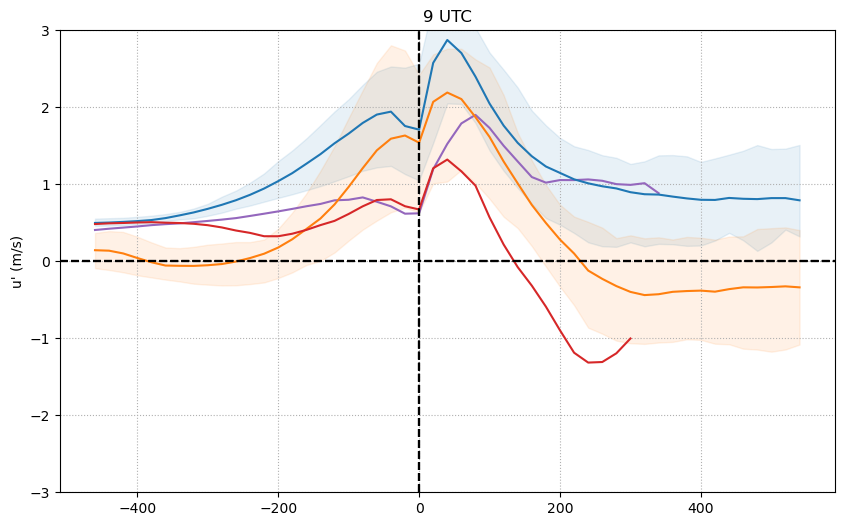

In [35]:
fig = plt.figure(figsize=[10,6])

ax1=plt.axes()
ax1.set_ylim([-3,3])

lats1 = [-45,-35,-25,-15]
lats2 = [-35,-25,-15,-5]
colors = ["tab:purple","tab:blue","tab:orange","tab:red"]

for lat1, lat2, c in zip(lats1,lats2,colors):
    print(lat1,lat2)
    plot(
        ax1,
        vprime_nov_apr.sel(lat=slice(lat1,lat2)),
        angle_ds.variance_interp.sel(lat=slice(lat1,lat2)),
        min_coast_dist.sel(lat=slice(lat1,lat2)),
        lsm.sel(lat=slice(lat1,lat2)),
        9,
        color=c
    )


## Animation

In [52]:
for h in np.arange(0,24):
    plt.figure()
    ax=plt.axes(projection=ccrs.PlateCarree())

    plot_map(ax,vprime_nov_apr,min_coast_dist,angle_ds.variance_interp,h,-4,4)

    plt.title(str(h))
    plt.savefig("/g/data/ng72/ab4502/figs/hourly_oe/"+str(h).zfill(2)+".png")
    plt.close()

!convert -delay 20 -loop 20 /g/data/ng72/ab4502/figs/hourly_oe/*.png /g/data/ng72/ab4502/figs/hourly_oe/vprime_pert_map_nov_apr.gif

In [96]:
def plot(ax1, vprime_da, variance, min_coast_dist, lsm, h, ls="-", color="tab:blue"):

    bins, y, up, low = summarise_oe(
        vprime_da,
        variance,
        h,
        min_coast_dist,
        lsm)
    l1, = ax1.plot(bins,y,label=str(h),color=color,ls=ls)
    ax1.fill_between(bins,low,up,color=color,alpha=0.1)
    
    ax1.grid(ls=":")
    ax1.axhline(ls="--",color="k")
    ax1.axvline(ls="--",color="k")

    plt.title(str(h)+" UTC")

    ax1.set_ylabel("u' (m/s)")

    return l1

for h in np.arange(0,24):
    plt.figure()
    ax=plt.gca()

    plot(ax,vprime_nov_apr,angle_ds.variance_interp,min_coast_dist,lsm,h)

    plt.title(str(h))
    plt.ylim([-4,4])
    plt.savefig("/g/data/ng72/ab4502/figs/hourly_oe/"+str(h).zfill(2)+".png")
    plt.close()

!convert -delay 20 -loop 20 /g/data/ng72/ab4502/figs/hourly_oe/*.png /g/data/ng72/ab4502/figs/hourly_oe/hourly_oe_nov_apr_vprime.gif

In [36]:
def plot(ax1, vprime_da, variance, min_coast_dist, lsm, h, ls="-", color="tab:blue"):

    bins, y, up, low = summarise_oe(
        vprime_da,
        variance,
        h,
        min_coast_dist,
        lsm)
    l1, = ax1.plot(bins,y,label=str(h),color=color,ls=ls)
    ax1.fill_between(bins,low,up,color=color,alpha=0.1)
    
    ax1.grid(ls=":")
    ax1.axhline(ls="--",color="k")
    ax1.axvline(ls="--",color="k")

    plt.title(str(h)+" UTC")

    ax1.set_ylabel("u' (m/s)")

    return l1

for h in np.arange(0,24):
#for h in [6]:
    plt.figure()
    ax=plt.gca()

    l1 = plot(ax,vprime_nov_apr.sel(lat=slice(-30,0)),
         angle_ds.variance_interp.sel(lat=slice(-30,0)),
         min_coast_dist.sel(lat=slice(-30,0)),
         lsm.sel(lat=slice(-30,0)),
         h,color="tab:red")
    l2 = plot(ax,vprime_nov_apr.sel(lat=slice(-90,-30)),
         angle_ds.variance_interp.sel(lat=slice(-90,-30)),
         min_coast_dist.sel(lat=slice(-90,-30)),
         lsm.sel(lat=slice(-90,-30)),
         h,color="tab:purple")

    plt.title(str(h))
    plt.ylim([-4,4])
    plt.legend([l1,l2],["Equatorward of 30$\degree$S","Poleward of 30$\degree$S"],loc="upper left")
    plt.savefig("/g/data/ng72/ab4502/figs/hourly_oe/"+str(h).zfill(2)+".png")
    plt.close()

!convert -delay 20 -loop 20 /g/data/ng72/ab4502/figs/hourly_oe/*.png /g/data/ng72/ab4502/figs/hourly_oe/hourly_oe_30S_vprime.gif

In [15]:
def plot(ax1, vprime_da, variance, min_coast_dist, lsm, h, ls="-", color="tab:blue"):

    bins, y, up, low = summarise_oe(
        vprime_da,
        variance,
        h,
        min_coast_dist,
        lsm)
    l1, = ax1.plot(bins,y,label=str(h),color=color,ls=ls)
    ax1.fill_between(bins,low,up,color=color,alpha=0.1)
    
    ax1.grid(ls=":")
    ax1.axhline(ls="--",color="k")
    ax1.axvline(ls="--",color="k")

    plt.title(str(h)+" UTC")

    ax1.set_ylabel("u' (m/s)")

    return l1

for h in np.arange(0,24):
    plt.figure()
    ax=plt.gca()

    plot(ax,vprime_may_oct,angle_ds.variance_interp,min_coast_dist,lsm,h,color="tab:blue")

    plt.title(str(h))
    plt.ylim([-4,4])
    plt.savefig("/g/data/ng72/ab4502/figs/hourly_oe/"+str(h).zfill(2)+".png")
    plt.close()

!convert -delay 20 -loop 20 /g/data/ng72/ab4502/figs/hourly_oe/*.png /g/data/ng72/ab4502/figs/hourly_oe/hourly_may_oct_vprime.gif

In [23]:
def plot(ax1, vprime_da, variance, min_coast_dist, lsm, h, ls="-", color="tab:blue",label=""):

    bins, y, up, low = summarise_oe(
        vprime_da,
        variance,
        h,
        min_coast_dist,
        lsm)
    l1, = ax1.plot(bins,y,color=color,ls=ls,label=label)
    ax1.fill_between(bins,low,up,color=color,alpha=0.1)
    
    ax1.grid(ls=":")
    ax1.axhline(ls="--",color="k")
    ax1.axvline(ls="--",color="k")

    plt.title(str(h)+" UTC")

    ax1.set_ylabel("u' (m/s)")

    return l1

for h in np.arange(0,24):

    plt.figure()
    ax=plt.gca()

    l1=plot(ax,vprime_may_oct,angle_ds.variance_interp,min_coast_dist,lsm,h,color="tab:blue",label="May-Oct")
    l2=plot(ax,vprime_nov_apr,angle_ds.variance_interp,min_coast_dist,lsm,h,color="tab:red",label="Nov-Apr")

    plt.title(str(h))
    plt.ylim([-4,4])

    plt.legend([l1,l2],["May-Oct","Nov-Apr"],loc="upper left")
    
    plt.savefig("/g/data/ng72/ab4502/figs/hourly_oe/"+str(h).zfill(2)+".png")
    plt.close()
    

!convert -delay 20 -loop 20 /g/data/ng72/ab4502/figs/hourly_oe/*.png /g/data/ng72/ab4502/figs/hourly_oe/hourly_may_oct_apt_nov_vprime.gif

In [21]:
def plot(ax1, vprime_da, variance, min_coast_dist, lsm, h, ls="-", color="tab:blue",label=""):

    bins, y, up, low = summarise_oe(
        vprime_da,
        variance,
        h,
        min_coast_dist,
        lsm)
    l1, = ax1.plot(bins,y,color=color,ls=ls,label=label)
    ax1.fill_between(bins,low,up,color=color,alpha=0.1)
    
    ax1.axhline(ls="--",color="k")
    ax1.axvline(ls="--",color="k")

    plt.title(str(h)+" UTC")

    return l1

for h in np.arange(0,24):

    plt.figure()
    ax=plt.gca(); ax2=ax.twinx()

    l1=plot(ax,vprime_nov_apr,angle_ds.variance_interp,min_coast_dist,lsm,h,color="tab:blue")
    l2=plot(ax2,cf_nov_apr,angle_ds.variance_interp,min_coast_dist,lsm,h,color="tab:orange")

    plt.title(str(h))
    ax.set_ylim([-4,4])
    ax2.set_ylim([-0.5,0.5])

    plt.legend([l1,l2],["u'","Capacity Factor"],loc="upper left")

    ax.grid(ls=":")
    ax.set_ylabel("u' (m/s)")
    ax.set_ylabel("Capacity factor")
    
    plt.savefig("/g/data/ng72/ab4502/figs/hourly_oe/"+str(h).zfill(2)+".png")
    plt.close()
    

!convert -delay 20 -loop 20 /g/data/ng72/ab4502/figs/hourly_oe/*.png /g/data/ng72/ab4502/figs/hourly_oe/hourly_may_oct_apt_nov_vprime_cf.gif

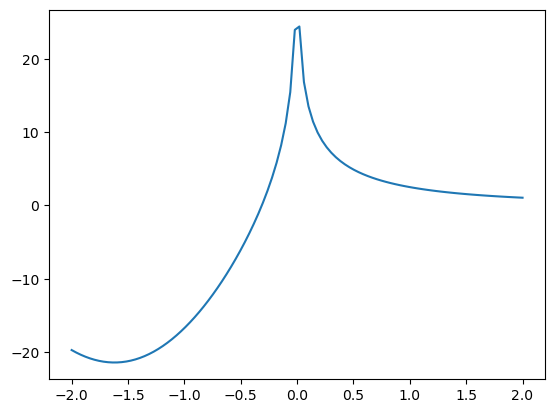

In [36]:
beta = 7.27 * 10**-3
A = 1000
tao = np.pi / 2
x = np.linspace(-2,2,100)

import scipy
si, ci = scipy.special.sici(x)

plt.plot(x,np.squeeze(
    beta * A * np.sin(tao) * ( ( -ci * np.cos(x) ) + ( ((0.5*np.pi - si) * np.sin(x) )) ) 
)
        )

In [150]:
y = xr.open_dataset(
    "/g/data/ng72/ab4502/hourly_composites/barra_c/barra_c_hourly_perturbation_uas_vas_201601010000_201601312300.nc"
    ).vprime_pert.sel(lat=-20,lon=120,method="nearest")
x = np.arange(0,24)

In [3]:
from scipy.optimize import curve_fit

def fit_amplitude(ds):
    
    def daily_cycle(t, A, phi):
        return A * np.cos(2 * np.pi * t / 24 + phi)

    popt_sample, pcov2_sample = curve_fit(daily_cycle, np.arange(0,24), ds, p0=[1, 0])
    
    return np.abs(popt_sample[0])


ds = xr.open_dataset(
    "/g/data/ng72/ab4502/hourly_composites/barra_c/barra_c_hourly_perturbation_uas_vas_201601010000_201601312300.nc",
    chunks={"lat":200,"lon":200}).vprime_pert

test_out = xr.apply_ufunc(
    fit_amplitude,
    ds,
    input_core_dims = [["hour"]],
    dask="parallelized",
    vectorize=True).compute()

/jobfs/141993829.gadi-pbs/ipykernel_4158446/3554497865.py:8: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_sample, pcov2_sample = curve_fit(daily_cycle, np.arange(0,24), ds, p0=[1, 0])


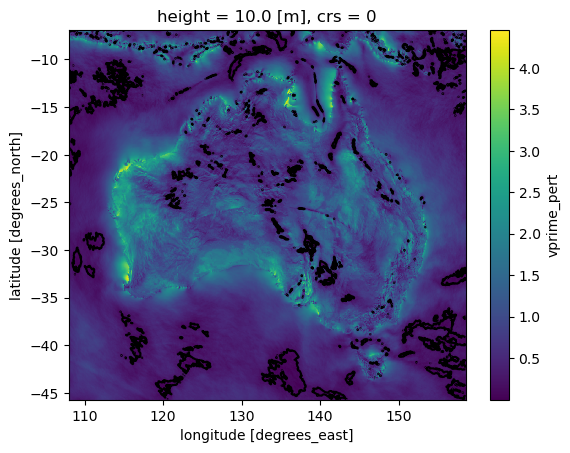

In [27]:
test_out.plot()
xx,yy=np.meshgrid(ds.lon,ds.lat)
plt.contour(xx,yy,(1-stats.t.cdf(np.abs(t_stat), df=22)),levels=[0.05],colors="k")

In [5]:
from scipy.optimize import curve_fit

def fit_amplitude(ds):
    
    def daily_cycle(t, A, phi):
        return A * np.cos(2 * np.pi * t / 24 + phi)

    popt_sample, pcov2_sample = curve_fit(daily_cycle, np.arange(0,24), ds, p0=[1, 0])
    
    return pcov2_sample[0,0]


test_cov = xr.apply_ufunc(
    fit_amplitude,
    ds,
    input_core_dims = [["hour"]],
    dask="parallelized",
    vectorize=True).compute()

/jobfs/141993829.gadi-pbs/ipykernel_4158446/3989137879.py:8: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_sample, pcov2_sample = curve_fit(daily_cycle, np.arange(0,24), ds, p0=[1, 0])


In [9]:
t_stat = (test_out / np.sqrt(test_cov))

import scipy.stats as stats

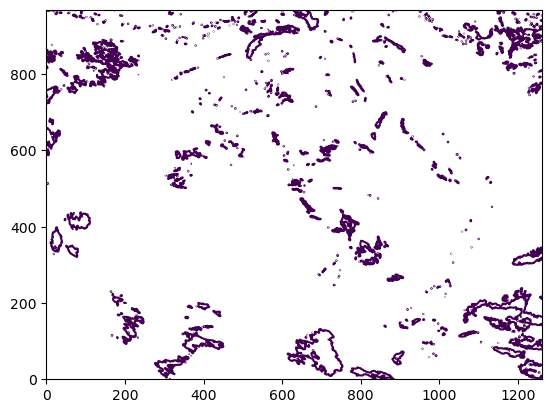

In [ ]:
test95 = xr.concat([xr.apply_ufunc(
    fit_amplitude,
    ds.isel(hour=np.random.randint(0,24,24)),
    input_core_dims = [["hour"]],
    dask="parallelized",
    vectorize=True) for N in range(100)],dim="test").chunk({"test":-1}).quantile(.95,dim="test").compute()

/jobfs/141993829.gadi-pbs/ipykernel_4153115/3554497865.py:8: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_sample, pcov2_sample = curve_fit(daily_cycle, np.arange(0,24), ds, p0=[1, 0])
/jobfs/141993829.gadi-pbs/ipykernel_4153115/3554497865.py:8: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_sample, pcov2_sample = curve_fit(daily_cycle, np.arange(0,24), ds, p0=[1, 0])
/jobfs/141993829.gadi-pbs/ipykernel_4153115/3554497865.py:8: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_sample, pcov2_sample = curve_fit(daily_cycle, np.arange(0,24), ds, p0=[1, 0])
/jobfs/141993829.gadi-pbs/ipykernel_4153115/3554497865.py:8: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_sample, pcov2_sample = curve_fit(daily_cycle, np.arange(0,24), ds, p0=[1, 0])
/jobfs/141993829.gadi-pbs/ipykernel_4153115/3554497865.py:8: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_sam

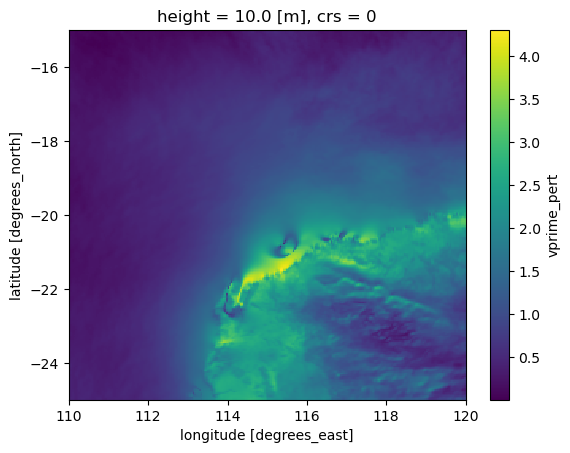

In [20]:
test_out.plot()

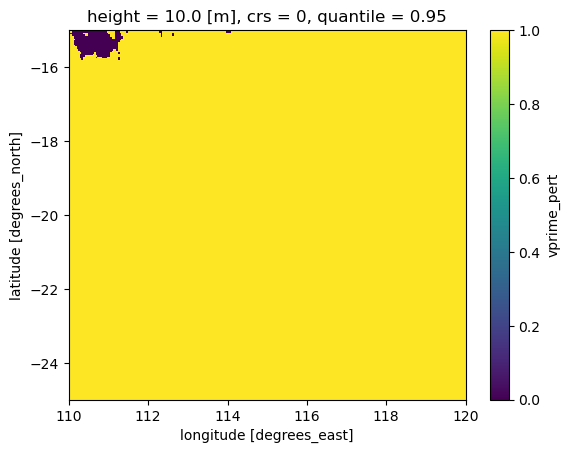

In [22]:
(test_out > test95).plot()

In [ ]:
sample_out

In [151]:
from scipy.optimize import curve_fit

def sig_test():

def daily_cycle(t, A, phi):
    return A * np.cos(2 * np.pi * t / 24 + phi)




-0.2958988553828102


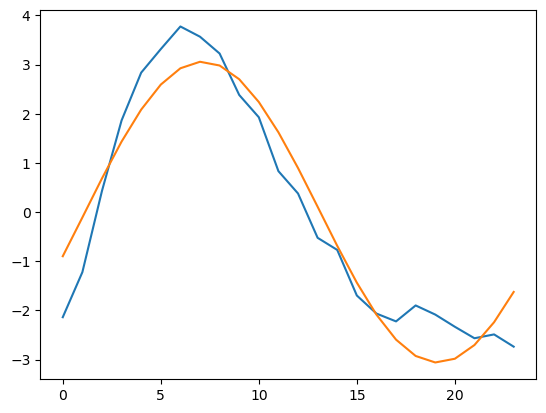

In [152]:
popt_sample, pcov2_sample = curve_fit(daily_cycle, x, y.values, p0=[1, 0])
plt.plot(x,y)
plt.plot(x,daily_cycle(x,popt_sample[0],popt_sample[1]))

print(popt[0])

In [153]:
test_dist = []
for N in range(1000):
    ytest = y[np.random.randint(0,len(x),size=len(x))]
    popt, pcov2 = curve_fit(daily_cycle, x, ytest.values, p0=[1, 0])
    test_dist.append(np.abs(popt[0]))


0.0

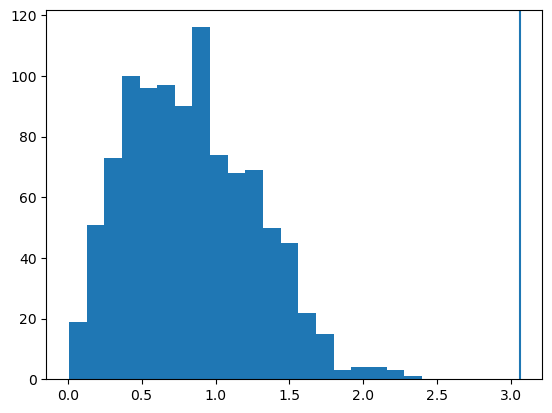

In [154]:
plt.hist(test_dist,bins=20)
plt.gca().axvline(popt_sample[0])

(np.array(test_dist)>np.abs(popt_sample[0])).sum() / len(test_dist)